In [2]:
import os
import pandas as pd
import shutil

# Define the directory paths and Excel file
image_dir = "/home/monika/HLA-TMA/HLA-TMA/HLA-TMA"
excel_file = "/home/monika/HLA-TMA/GRADES.xlsx"

# Read the Excel file
grades_df = pd.read_excel(excel_file)

# Create directories for each category if they don't exist, including '0'
categories = ['0', '1', '2', '3', '4', '1-2']

for category in categories:
    category_dir = os.path.join(image_dir, category)
    if not os.path.exists(category_dir):
        os.makedirs(category_dir)

# Iterate through the TIFF files in the directory
for root, _, files in os.walk(image_dir):
    for filename in files:
        if filename.endswith(".tif"):
            image_name = os.path.splitext(filename)[0]
            grade_row = grades_df.loc[grades_df['Position'] == image_name]
            
            if not grade_row.empty:
                grade = grade_row.iloc[0]['Grade']
                print(f"Processing {filename}, Grade: {grade}")

                if grade == 0:
                    if not os.path.exists(os.path.join(image_dir, '0')):
                        os.makedirs(os.path.join(image_dir, '0'))
                    shutil.move(os.path.join(root, filename), os.path.join(image_dir, '0', filename))
                    print(f"Moved {filename} to '0'")

                elif grade == 1:
                    if not os.path.exists(os.path.join(image_dir, '1')):
                        os.makedirs(os.path.join(image_dir, '1'))
                    shutil.move(os.path.join(root, filename), os.path.join(image_dir, '1', filename))
                    print(f"Moved {filename} to '1'")

                elif grade == 2:
                    if not os.path.exists(os.path.join(image_dir, '2')):
                        os.makedirs(os.path.join(image_dir, '2'))
                    shutil.move(os.path.join(root, filename), os.path.join(image_dir, '2', filename))
                    print(f"Moved {filename} to '2'")

                elif grade == 3:
                    if not os.path.exists(os.path.join(image_dir, '3')):
                        os.makedirs(os.path.join(image_dir, '3'))
                    shutil.move(os.path.join(root, filename), os.path.join(image_dir, '3', filename))
                    print(f"Moved {filename} to '3'")

                elif grade == 4:
                    if not os.path.exists(os.path.join(image_dir, '4')):
                        os.makedirs(os.path.join(image_dir, '4'))
                    shutil.move(os.path.join(root, filename), os.path.join(image_dir, '4', filename))
                    print(f"Moved {filename} to '4'")

                elif grade in [1, 2]:
                    if not os.path.exists(os.path.join(image_dir, '1-2')):
                        os.makedirs(os.path.join(image_dir, '1-2'))
                    shutil.move(os.path.join(root, filename), os.path.join(image_dir, '1-2', filename))
                    print(f"Moved {filename} to '1-2'")

                else:
                    print(f"Unrecognized grade for {filename}: {grade}")
            else:
                print(f"No grade information found for {filename}")

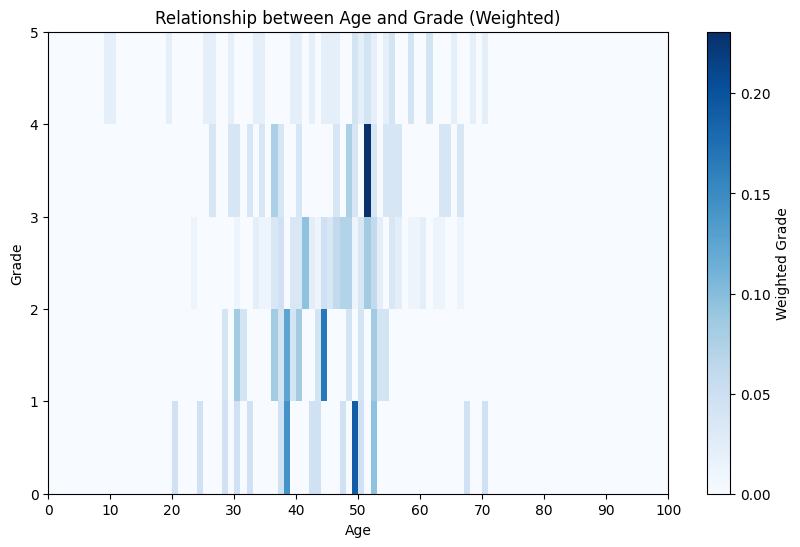

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Excel file into a Pandas DataFrame
file_path = '/home/monika/HLA-TMA/GRADES.xlsx'
df = pd.read_excel(file_path)

# Convert 'Age' and 'Grade' columns to the appropriate data types
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Grade'] = pd.to_numeric(df['Grade'], errors='coerce')

# Drop rows with NaN values in the 'Grade' column
df = df.dropna(subset=['Grade'])

# Count the occurrences of each grade
grade_counts = df['Grade'].value_counts().sort_index()

# Calculate weights based on the inverse of grade frequencies
weights = 1 / grade_counts.loc[df['Grade']].values

# Create a 2D histogram to visualize the relationship between Age and Grade with weights
plt.figure(figsize=(10, 6))
plt.hist2d(df['Age'], df['Grade'], bins=[range(0, 101), [0, 1, 2, 3, 4, 5]], cmap='Blues', weights=weights)
plt.colorbar(label='Weighted Grade')
plt.title('Relationship between Age and Grade (Weighted)')
plt.xlabel('Age')
plt.ylabel('Grade')
plt.xticks(range(0, 101, 10))
plt.yticks([0, 1, 2, 3, 4, 5])

# Show the plot
plt.show()

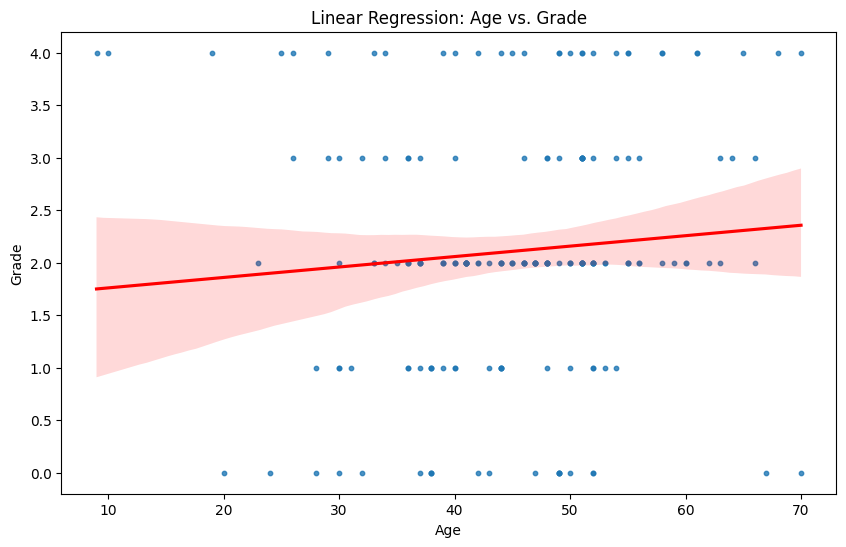

In [5]:
!pip install seaborn

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Excel file into a Pandas DataFrame
file_path = '/home/monika/HLA-TMA/GRADES.xlsx'
df = pd.read_excel(file_path)

# Convert 'Age' and 'Grade' columns to the appropriate data types
df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Grade'] = pd.to_numeric(df['Grade'], errors='coerce')

# Filter out rows with NaN values in Age or Grade
filtered_df = df.dropna(subset=['Age', 'Grade'])

# Create a linear regression plot
plt.figure(figsize=(10, 6))
sns.regplot(x='Age', y='Grade', data=filtered_df, scatter_kws={'s': 10}, line_kws={'color': 'red'})
plt.title('Linear Regression: Age vs. Grade')
plt.xlabel('Age')
plt.ylabel('Grade')

# Show the plot
plt.show()

In [11]:
import pandas as pd

# Load the Excel file into a Pandas DataFrame
file_path = '/home/monika/HLA-TMA/GRADES.xlsx'
df = pd.read_excel(file_path)

# Convert 'Grade' column to the appropriate data type
df['Grade'] = pd.to_numeric(df['Grade'], errors='coerce')

# Count the number of occurrences for each grade
total_grade_counts = df['Grade'].value_counts().sort_index()

# Calculate proportions rounded to 2 decimal places
total_grade_proportions = (total_grade_counts / total_grade_counts.sum()).round(2)

# Display the results
print("Grade Counts:")
print(total_grade_counts)

print("\nGrade Proportions:")
print(total_grade_proportions)

Grade Counts:
Grade
0.0    21
1.0    24
2.0    84
3.0    26
4.0    48
Name: count, dtype: int64

Grade Proportions:
Grade
0.0    0.10
1.0    0.12
2.0    0.41
3.0    0.13
4.0    0.24
Name: count, dtype: float64


In [35]:
from PIL import Image

input_directory = '/home/monika/HLA-TMA/HLA-TMA/1/A1.tif'

# Load the image
try:
    image = Image.open(input_directory)
    width, height = image.size
    print(f"Image size (width x height): {width} x {height}")
except IOError as e:
    print("Problem Opening", input_directory, ":", e)

Image size (width x height): 1920 x 1200


In [5]:
from PIL import Image

input_directory = '/home/monika/HLA-TMA-10percent_to_train/cropped/0_cropped/D9.tif'

# Load the image
try:
    image = Image.open(input_directory)
    width, height = image.size
    print(f"Image size (width x height): {width} x {height}")
except IOError as e:
    print("Problem Opening", input_directory, ":", e)

Image size (width x height): 1200 x 1200
